# Scale Free

In [1]:
from SubTempNet import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
N = [100]
gamma = [1.5,2,2.5,3]
S = [500]
Tmax = 20000

(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00737020e+00, 6.60790597e+03, 1.32148046e+04, 1.98217032e+04,
        2.64286018e+04, 3.30355003e+04, 3.96423989e+04, 4.62492975e+04,
        5.28561961e+04, 5.94630947e+04, 6.60699933e+04]),
 <a list of 10 Patch objects>)

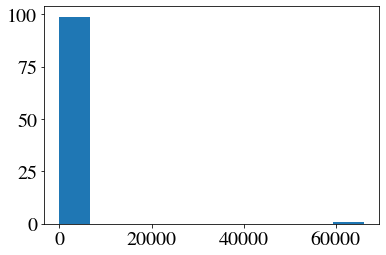

In [15]:
plt.hist(nx.utils.powerlaw_sequence(100, 1.5))

In [63]:
#Create Temporal networks
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(15):
                name = "data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                A = []
                deg = False
                while deg == False:
                    try:
                        deg = nx.utils.powerlaw_sequence(n, g)
                    except:
                        pass
                deg = np.array(deg)/s #scale down degree sequence
                for t in range(Tmax):
                    A.append(SubTempNet.ChungLu(deg))
                    
                #check that first and last snapshot contain at least one edge
                if len(A[0].edges()) ==0:
                    u,v = np.random.choice(range(n),2,replace = False )
                    A[0].add_edge(u,v)
                if len(A[-1].edges()) ==0:
                    u,v = np.random.choice(range(n),2,replace = False )
                    A[-1].add_edge(u,v)
                #write snapshotlist as edgelist file
                SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')
                print(n,s,g,rep)

100 500 1.5 1
100 500 1.5 2
100 500 1.5 3
100 500 1.5 4
100 500 1.5 5
100 500 1.5 6
100 500 1.5 7
100 500 1.5 8
100 500 1.5 9
100 500 1.5 10
100 500 1.5 11
100 500 1.5 12
100 500 1.5 13
100 500 1.5 14
100 500 2 1
100 500 2 2
100 500 2 3
100 500 2 4
100 500 2 5
100 500 2 6
100 500 2 7
100 500 2 8
100 500 2 9
100 500 2 10
100 500 2 11
100 500 2 12
100 500 2 13
100 500 2 14
100 500 2.5 1
100 500 2.5 2
100 500 2.5 3
100 500 2.5 4
100 500 2.5 5
100 500 2.5 6
100 500 2.5 7
100 500 2.5 8
100 500 2.5 9
100 500 2.5 10
100 500 2.5 11
100 500 2.5 12
100 500 2.5 13
100 500 2.5 14
100 500 3 1
100 500 3 2
100 500 3 3
100 500 3 4
100 500 3 5
100 500 3 6
100 500 3 7
100 500 3 8
100 500 3 9
100 500 3 10
100 500 3 11
100 500 3 12
100 500 3 13
100 500 3 14


In [65]:
#initialize Temporal network Objects
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(15):
                filepath ="data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                objname = "SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                STN= SubTempNet(filepath,objname,directed= False, init = True)
                STN.save()
                print(n,s,g,rep)

100 500 1.5 1
100 500 1.5 2
100 500 1.5 3
100 500 1.5 4
100 500 1.5 5
100 500 1.5 6
100 500 1.5 7
100 500 1.5 8
100 500 1.5 9
100 500 1.5 10
100 500 1.5 11
100 500 1.5 12
100 500 1.5 13
100 500 1.5 14
100 500 2 1
100 500 2 2
100 500 2 3
100 500 2 4
100 500 2 5
100 500 2 6
100 500 2 7
100 500 2 8
100 500 2 9
100 500 2 10
100 500 2 11
100 500 2 12
100 500 2 13
100 500 2 14
100 500 2.5 1
100 500 2.5 2
100 500 2.5 3
100 500 2.5 4
100 500 2.5 5
100 500 2.5 6
100 500 2.5 7
100 500 2.5 8
100 500 2.5 9
100 500 2.5 10
100 500 2.5 11
100 500 2.5 12
100 500 2.5 13
100 500 2.5 14
100 500 3 1
100 500 3 2
100 500 3 3
100 500 3 4
100 500 3 5
100 500 3 6
100 500 3 7
100 500 3 8
100 500 3 9
100 500 3 10
100 500 3 11
100 500 3 12
100 500 3 13
100 500 3 14


[1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 16, 20, 24, 29, 35, 42, 51, 62, 75, 91, 109, 132, 159, 193, 232, 281, 339, 409, 494, 596, 719, 868, 1048, 1264, 1526, 1842, 2222, 2682, 3237, 3906, 4714, 5689, 6866, 8286, 10000]
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


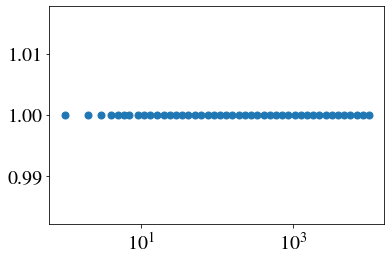

In [72]:
num = 50
T = sorted(list(set(np.logspace(np.log10(10000),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")
I = [2** i for i in range(1,int(np.log2(10000)+1))]
print(I)

In [50]:
#Run Objects
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(5):
                filepath ="data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                objname = "SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                STN= SubTempNet(filepath,objname,directed= False, init = False)
                STN.run2(I, T,  maxsamp = 25, minsamp = 5)
                STN.save()
                print(n,s,g,rep)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 16, 20, 24, 29, 35, 42, 51, 62, 75, 91, 109, 132, 159, 193, 232, 281, 339, 409, 494, 596, 719, 868, 1048, 1264, 1526, 1842, 2222, 2682, 3237, 3906, 4714, 5689]
Analyzing sample number 5 for samplelength  6866


In [73]:
Results = {}
degseq = {}
for g in gamma:
    Results[g]={}
    PAlist = ["PA0"]+["PAT"+str(i) for i in I]+["PAT"]
    for PA in PAlist:
        Results[g][PA]={}
    degseq[g]=[]

In [74]:
#get Results
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(15):
                filepath ="data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                objname = "SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(Tmax)+"_s"+str(s)+"_rep"+str(rep)
                STN= SubTempNet(filepath,objname,directed= False, init = False)
                PAlist = ["PA0"]+["PAT"+str(i) for i in I]+["PAT"]
                for PA in  PAlist:
                    for key,val in STN[PA].items():
                        try:
                            Results[g][PA][key] += val
                        except:
                            Results[g][PA][key] = val
                degseq[g]+=list(STN["deg_seq"])
d={key:  np.mean(val)/20000/(STN["ncount"]-1) for key,val in degseq.items()}

In [23]:
def mean_k_new(g, km,kM):
    g=g+0.000000001
    mk = (1-g)*(kM**(2-g)-km**(2-g))/((2-g)*(kM**(1-g)-km**(1-g)))
    return mk

In [6]:
def mean_k(g, km):
    g=g+0.000000001
    mk = (1-g)*(km**(2-g)-1)/((2-g)*(km**(1-g)-1))
    return mk

In [58]:
STN.save_obj(Results, "SF_Results")

In [2]:
Results = SubTempNet.load_obj("SF_Results")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


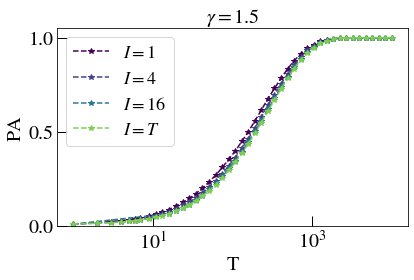

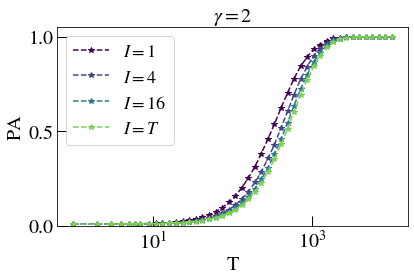

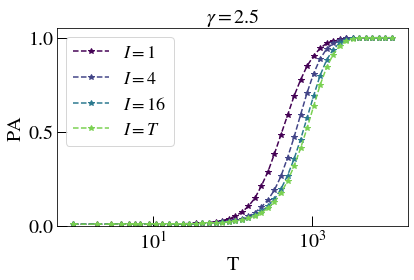

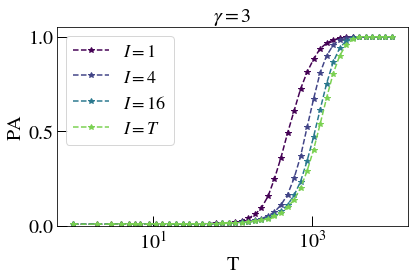

In [76]:
s=100**2
colrange = [1,2,3,4,5]
colo = plt.cm.get_cmap('viridis', len(colrange)+1).colors
for g in gamma:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_yscale("linear")
        ax.set_ylabel("PA")  
        ax.set_xlabel("T")
        linestyle = "--*"
    #for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        plt.plot(x,PAT, linestyle, color = colo[0], label = r'$I=1$')
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([np.mean(y)/s for t,y in Results[g]["PAT4"].items()])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        plt.plot(x,PAT4, linestyle, color = colo[1], label = r'$I=4$')
        
        x = list([key for key,val in Results[g]["PAT16"].items()])
        PAT16 = list([np.mean(y)/s for t,y in Results[g]["PAT16"].items()])
        x,PAT16= zip(*sorted(zip(*(x,PAT16))))
        plt.plot(x,PAT16, linestyle, color = colo[2], label = r'$I=16$')

        x = list([key for key,val in Results[g]["PA0"].items()])
        PA0 =  list([np.mean(y)/s for t,y in Results[g]["PA0"].items()])
        x,PA0= zip(*sorted(zip(*(x,PA0))))
        plt.plot(x,PA0, linestyle, color = colo[4], label = r'$I=T$')
        
        #LCC
        if False:
            s=100**2
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
            x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
            plt.plot(x,PAT_LCC, linestyle, label = "LCC")
        
        ax.legend()
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
        ax.set_title( r'$\gamma=$'+str(g))
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


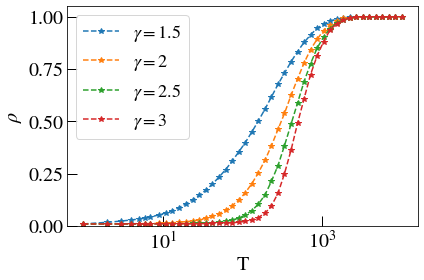

In [79]:
s=100**2
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel(r'$\rho$')  
ax.set_xlabel("T")
linestyle = "--*"
for g in gamma:
    #for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
    
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        plt.plot(x,PAT, linestyle, label = r'$\gamma =$'+str(g))
        """
        x = list([key for key,val in Results[g]["PAT2"].items()])
        PAT2 = list([np.mean(y)/s for t,y in Results[g]["PAT2"].items()])
        x,PAT2= zip(*sorted(zip(*(x,PAT2))))
        plt.plot(x,PAT2, linestyle, label = "L= T/2")
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([np.mean(y)/s for t,y in Results[g]["PAT4"].items()])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        plt.plot(x,PAT4, linestyle, label = "L= T/4")
        
        x = list([key for key,val in Results[g]["PAT8"].items()])
        PAT8 = list([np.mean(y)/s for t,y in Results[g]["PAT8"].items()])
        x,PAT8= zip(*sorted(zip(*(x,PAT8))))
        plt.plot(x,PAT8, linestyle, label = "L= T/8")  
        
        x = list([key for key,val in Results[g]["PA0"].items()])
        PA0 =  list([np.mean(y)/s for t,y in Results[g]["PA0"].items()])
        x,PA0= zip(*sorted(zip(*(x,PA0))))
        plt.plot(x,PA0, linestyle, label = "L=1")
        """
        #LCC
        if False:
            s=100**2
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
            x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
            plt.plot(x,PAT_LCC, linestyle, label = "LCC")
        
ax.legend()
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
fig.tight_layout()
fig.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


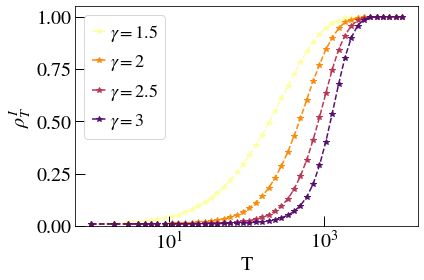

In [81]:
s=100**2
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel(r'$\rho_T^I$')  
ax.set_xlabel("T")
linestyle = "--*"

colrange = [1.6,2,2.4,2.8,3.2]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors

for i in range(len(gamma)):
        g=gamma[i]
        """
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        plt.plot(x,PAT, linestyle, label = r'$\gamma =$'+str(g))
        x = list([key for key,val in Results[g]["PAT2"].items()])
        PAT2 = list([np.mean(y)/s for t,y in Results[g]["PAT2"].items()])
        x,PAT2= zip(*sorted(zip(*(x,PAT2))))
        plt.plot(x,PAT2, linestyle, label = "L= T/2")
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([np.mean(y)/s for t,y in Results[g]["PAT4"].items()])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        plt.plot(x,PAT4, linestyle, label = "L= T/4")
        
        x = list([key for key,val in Results[g]["PAT8"].items()])
        PAT8 = list([np.mean(y)/s for t,y in Results[g]["PAT8"].items()])
        x,PAT8= zip(*sorted(zip(*(x,PAT8))))
        plt.plot(x,PAT8, linestyle, label = "L= T/8")  
        """
        x = list([key for key,val in Results[g]["PA0"].items()])
        PA0 =  list([np.mean(y)/s for t,y in Results[g]["PA0"].items()])
        x,PA0= zip(*sorted(zip(*(x,PA0))))
        plt.plot(x,PA0, linestyle, color = colo[i],label = r'$\gamma =$'+str(g))
        
ax.legend(handlelength = 0.8, handletextpad=0.2, loc= "upper left")
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
fig.tight_layout()
fig.show()
fig.savefig("fig/SF_rho", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


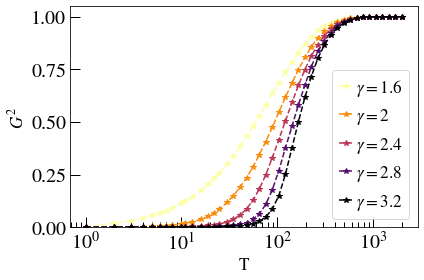

In [16]:
s=100**2
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel(r'$G^2$')  
ax.set_xlabel("T")
linestyle = "--*"
colrange = [1.6,2,2.4,2.8,3.2]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
gamma = [1.6,2,2.4,2.8,3.2]


for i in range(len(gamma)):
        g=gamma[i]
        s=100**2
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
        x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
        plt.plot(x,PAT_LCC, linestyle,color = colo[i], label = r'$\gamma =$'+str(g))
        
        if False:
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT =  list([((np.mean(y))/s)**1 for t,y in Results[g]["PAT"].items()])
            #PAT =  list([((np.mean(y))/s)**1 for t,y in self["PAT"].items()])
            x,PAT= zip(*sorted(zip(*(x,PAT))))
            plt.plot(x,PAT, linestyle,  label = "PAT")        
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.legend(handlelength = 0.8, handletextpad=0.2, loc= "lower right")
ax.set_ylim(0, ax.set_ylim()[1])
fig.tight_layout()
fig.show()
fig.savefig("fig/SF_G", dpi=600)

In [30]:
d={key:  np.mean(val)/20000/(STN["ncount"]-1) for key,val in degseq.items()}
d

{1.6: 0.0040912040404040406,
 2: 0.0007333171717171718,
 2.4: 0.00038512323232323234,
 2.8: 0.00027158383838383836,
 3.2: 0.00023014949494949496}

In [80]:
for g in gamma:
    km= 500*np.mean(sorted(degseq[g], reverse = True)[:11])
    mk= 500*mean_k(g,km)
    p = mk/20000/(STN["ncount"]-1)
    print(g,km,mk,p,d[g])

1.5 66160727.27272728 16.267848710709785 8.216085207429183e-06 0.0016912208754208753
2 7145727.272727273 0.031564054542015434 1.5941441687886582e-08 0.00015690572390572393
2.5 1085409.090909091 0.005994240898669329 3.027394393267338e-09 5.555622895622896e-05
3 698681.8181818181 0.00399999427294159 2.0201991277482776e-09 4.257845117845118e-05


In [99]:
#Create Temporal networks
degm = {}
degM = {}
degmean = {}
for n in N:
    for s in S:
        for g in gamma:
            degm[g]=[]
            degM[g]=[]
            degmean[g]=[]
            for rep in range(50):
                A = []
                deg = False
                while deg == False:
                    try:
                        deg = nx.utils.powerlaw_sequence(n, g)
                    except:
                        pass
                degm[g].append(min(deg))
                degM[g].append(max(deg))
                degmean[g].append(np.mean(deg))
                deg = np.array(deg)/s
for g in gamma:
    km=np.mean(degm[g])
    kM=np.mean(degM[g])
    print([g,km,kM,np.mean(degmean[g]),mean_k_new(g,km,kM)])

[1.5, 1.024544104715712, 270321.8615041783, 2906.20344405299, 526.266724061092]
[2, 1.0105982883146394, 6813.78884781915, 73.27420912346082, 8.91091882236246]
[2.5, 1.0052905575317603, 56.17545206944358, 3.0546923024381964, 2.618694769914045]
[3, 1.0059392432970495, 18.14854654373521, 1.9914859573730361, 1.906220336472196]


In [104]:
for g in gamma:
    km= np.mean(sorted(degseq[g], reverse = True)[:11])
    kM= np.mean(sorted(degseq[g], reverse = False)[:11])
    mk= mean_k_new(g,km,kM)
    p = mk/Tmax/(STN["ncount"]-1)
    print([g,km,mk,p,d[g]])

[1.5, 132321.45454545456, 2063.5757685833482, 0.0010422099841330041, 0.0016912208754208753]
[2, 14291.454545454546, 178.74330415555045, 9.02743960381568e-05, 0.00015690572390572393]
[2.5, 2170.818181818182, 76.83703560933037, 3.8806583641075947e-05, 5.555622895622896e-05]
[3, 1397.3636363636363, 52.27624429018756, 2.6402143580902812e-05, 4.257845117845118e-05]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


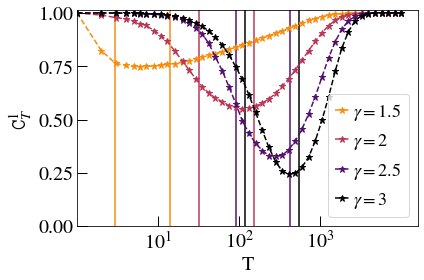

In [105]:
s=100**2
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel(r'$\mathtt{C}_T^1$')
ax.set_xlabel("T")
linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors

for i in range(len(gamma)):
        g=gamma[i]
        PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        
        ax.plot(x,PAT,linestyle,color = colo[i+1], label = r'$\gamma=$'+str(g))
        
        
        km= np.mean(sorted(degseq[g], reverse = True)[:11])
        kM= np.mean(sorted(degseq[g], reverse = False)[:11])
        mk= mean_k_new(g,1,km)/500
        p = mk/20000/(STN["ncount"]-1)
        n= 100
        p= 2*d[g]
        vline=[(STN.TC1(n,p), colo[i+1] , None),
               (STN.TC2(n,p), colo[i+1], None)]
        if vline:
            for (x,col,label) in vline:
                ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)

ax.legend(handlelength = 0.8, handletextpad=0.2, loc= "lower right")
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1,ax.set_xlim()[1])
ax.set_xticks([10,100,1000])
#ax.grid()
fig.tight_layout()
fig.show()
#fig.savefig("fig/SF_cT_ana", dpi=600)

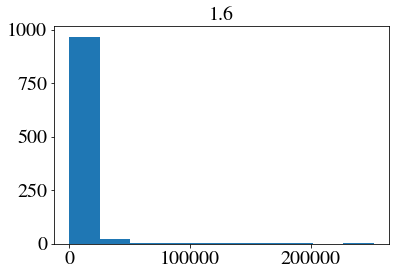

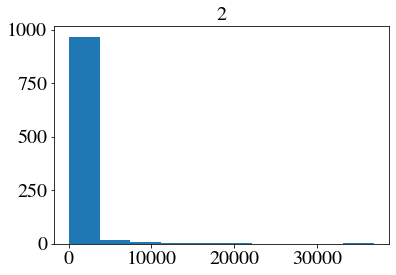

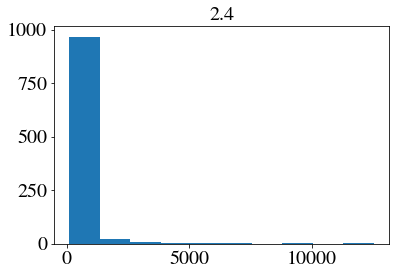

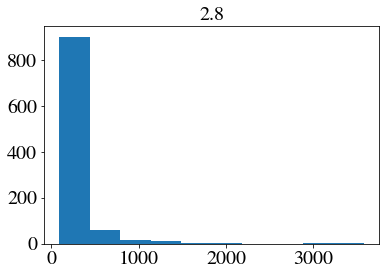

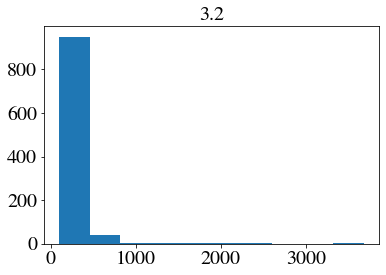

In [48]:
for g,h in degseq.items():
    plt.hist(h)
    plt.title(str(g))
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


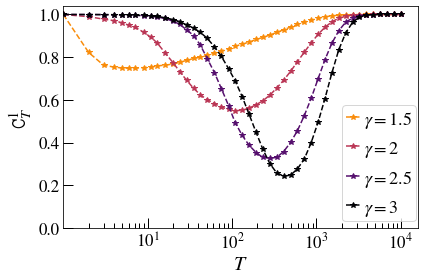

In [43]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
I=[1]

s=100**2

for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,linestyle,color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), colo[i+1] , None)]#, (STN.TC2(n,p), colo[i], None)]
    if False:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
fig.savefig("fig/SF_c.png", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


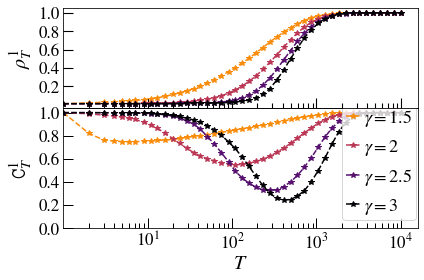

In [45]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[1])
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

axin = fig.add_subplot(gs[0], sharex = ax)
axin.set_xscale("log")
axin.set_ylabel(r'$\rho_T^1$') 
#axin.grid()
axin.set_yticks([0.2,0.4,0.6,0.8,1.0])
axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
I=[1]

s=100**2

for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,linestyle,color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, linestyle,color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), colo[i+1] , None)]#, (STN.TC2(n,p), colo[i], None)]
    if False:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
fig.savefig("fig/SF_cr.png", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


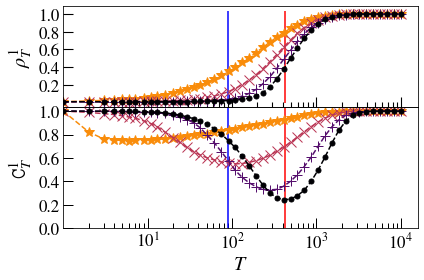

In [32]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[1])
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

axin = fig.add_subplot(gs[0], sharex = ax)
axin.set_xscale("log")
axin.set_ylabel(r'$\rho_T^1$') 
#axin.grid()
axin.set_yticks([0.2,0.4,0.6,0.8,1.0])
axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
lines = ["--*","--x","--+","--.","--^"]

I=[1]

s=100**2

for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,lines[i],color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, lines[i],color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), "blue" , None), (STN.TC2(n,p), "red", None)]
    if g ==2.5:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
                        
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
fig.savefig("fig/SF_cr_ana.png", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


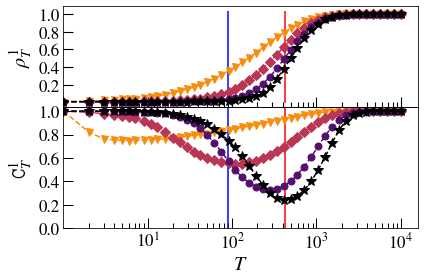

In [10]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[1])
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

axin = fig.add_subplot(gs[0], sharex = ax)
axin.set_xscale("log")
axin.set_ylabel(r'$\rho_T^1$') 
#axin.grid()
axin.set_yticks([0.2,0.4,0.6,0.8,1.0])
axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
lines = ["--v","--D","--o","--*","--^"]
mss=[7,7,7,10,7]


I=[1]

s=100**2

for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,lines[i],color = colo[i+1], ms=mss[i], label = r'$\gamma=$'+str(g))
    
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, lines[i],color = colo[i+1], ms=mss[i],label = r'$\gamma=$'+str(g))
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), "blue" , None), (STN.TC2(n,p), "red", None)]
    if g ==2.5:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
                        
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
fig.savefig("fig/SF_cr_ana.png", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


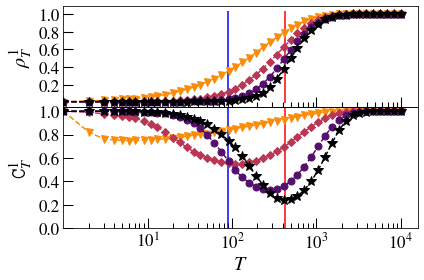

In [16]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[1])
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

axin = fig.add_subplot(gs[0], sharex = ax)
axin.set_xscale("log")
axin.set_ylabel(r'$\rho_T^1$') 
#axin.grid()
axin.set_yticks([0.2,0.4,0.6,0.8,1.0])
axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
lines = ["--v","--D","--o","--*","--^"]
mss=[7,6,7,10,7]


I=[1]

s=100**2

for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,lines[i],color = colo[i+1], ms=mss[i], label = r'$\gamma=$'+str(g))
    
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, lines[i],color = colo[i+1], ms=mss[i],label = r'$\gamma=$'+str(g))
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), "blue" , None), (STN.TC2(n,p), "red", None)]
    if g ==2.5:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
                        
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
#fig.savefig("fig/SF_cr_ana.png", dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


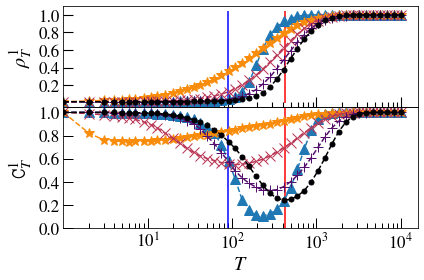

In [12]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[1])
ax.set_xscale("log")
ax.set_ylabel(r'$\mathtt{C}^1_T$')
ax.set_xlabel(r'$T$')
#ax.grid()
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')

axin = fig.add_subplot(gs[0], sharex = ax)
axin.set_xscale("log")
axin.set_ylabel(r'$\rho_T^1$') 
#axin.grid()
axin.set_yticks([0.2,0.4,0.6,0.8,1.0])
axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')

linestyle = "--*"
gamma = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
lines = ["--*","--x","--+","--.","--^"]

I=[1]

s=100**2

for p in [0.000085]:
    filepath ="data/ER/ER_n100_p"+f'{p:.6f}'[2:]+"_T15000.edges"
    objname = "ER_n100_p"+f'{p:.6f}'[2:]
    STN= SubTempNet(filepath,objname,directed= False, init = False)
    PA0 =  {t:np.mean(y) for t,y in STN["PA0"].items()}
    x = list([key for key,val in STN["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(STN["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,lines[-1],  label = r'$q='+f'{p:.5f}'[:]+'$')

    PAT =  list([np.mean(y)/(STN["ncount"]**2) for t,y in STN["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, lines[-1], label = r'$I=1$')

    
for i in range(len(gamma)):
    g=gamma[i]
    PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    ax.plot(x,PAT,lines[i],color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    x = list([key for key,val in Results[g]["PAT"].items()])
    PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
    x,PAT= zip(*sorted(zip(*(x,PAT))))
    axin.plot(x,PAT, lines[i],color = colo[i+1], label = r'$\gamma=$'+str(g))
    
    
    p= d[g]
    n= 100
    vline=[(STN.TC1(n,p), "blue" , None), (STN.TC2(n,p), "red", None)]
    if g ==2.5:
        for (x,col,label) in vline:
            ax.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
            axin.vlines(x = x, ymin=0, ymax =ax.set_ylim()[1] , colors = col)
legend = "lower right"
bbox = (1.02,-0.01)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)

                        
#ax.legend(handles, labels, borderpad = 0.2, handlelength = 0.8, handletextpad=0.2,loc= legend, bbox_to_anchor= bbox)
#plt.legend(handlelength = 0.8, handletextpad=0.2)
plt.setp(axin.get_xticklabels(), visible=False)
ax.set_xticks([i for i in ax.get_xticks(minor = False) if i > 1 and i < ax.set_xlim()[1]])
ax.set_ylim(0, ax.set_ylim()[1])
ax.set_xlim(1, ax.set_xlim()[1])
fig.tight_layout()
fig.subplots_adjust(hspace=.0)
fig.show()
fig.savefig("fig/SF_cr_ER_ana.png", dpi=600)

In [33]:
d[3]

8.515690235690236e-05

In [15]:
0.000085

8.5e-05